# Topic Segmentation w/ LDA
* 출처: https://happy-obok.tistory.com/5#recentComments

In [2]:
#필요한 모듈 임포트하기
import pandas as pd
from pandas import DataFrame  as df
import numpy as np
from collections import Counter
from konlpy.tag import Okt
okt = Okt()
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from wordcloud import WordCloud
from datetime import datetime

In [6]:
with open("./book-json/기드모파상_비계덩어리.json", encoding='utf-8') as json_file:
    json_data = json.load(json_file)

In [7]:
json_data

{'texts': [{'page': '1',
   'text': "며칠째 계속해서 패잔병 부대가 거리를 지나갔다. 군대라기보다는 유 랑민의 무리 같았다. 먼지가 잔뜩 묻은 수염은 자랄 대로 자라고, 누 더기 같은 군복을 걸치고, 깃발도 연대도 없었다. 지친 다리를 힘없이 끌면서 그저 앞을 향해서만 걸어간다. 모두 가눌 길 없이 피곤한 모양 인지 뭣을 생각할 기력도 결단력도 잃은 듯하다. 그래도 발을 움직이 고 있는 것은 타성 때문이요, 걸음을 멈추면 이내 피로에 사로잡혀 쓰 러질 것만 같기에 움직이는 것 같았다. 유난히 눈에 띄는 것은 나이든 응소병(應召兵)이었다. 그들은 평화를 사랑하는 시민으로서 평상시에 는 연금을 타며 한가로이 지내 왔었는데, 무거운 총을 메게 됐으니 허 리가 구부러지는 것도 무리가 아니다. 그리고는 유격대에 배속된 젊은 녀석들, 몸 놀림도 민첩하고 만용도 잘 부리지만 일단 유사시에는 오 금이 떨려서, 진격도 빠르지만 후퇴도 그에 못지않게 빠르다는 패거리 들이다. 그들과 뒤섞여서 빨간 바지도 간간이 보인다. 아마 어딘가에 서 벌어진 대전투에서 박살이 난 사단의 생존자일 것이다. 그처럼 잡 다한 옷차림의 보병이 칙칙한 옷을 입은 포병과 함께 가고 있는가 하 면, 용기병(龍騎兵)의 번쩍거리는 철모가 하나 갑자기 떠올라 보일 적 도 있었다. 행군에 익숙한 보병 뒤를 쫓아가노라니 무척 힘에 겨운 모 양으로 무거운 다리를 질질 끌고 있었다. 의용군 부대도 후퇴하고 있었다. '구국의 부대'라느니 '결사대'라느니 '혈맹단'이라느니 이름만은 용감하지만 보는 바에 의하면 비적 떼와 다름없다. 그 부대장이라는 것도 얼마 전까지는 포목장수였거나 씨앗장수, 기 름장수, 비누장사였던 자들로서 시절을 만나 군인이 되고 장교로 임명 됐지만 그것은 오직 돈푼이 있거나 수염이 길어서였을 것이다. 그런 자가 일단 긴 칼을 차고 견장을 달고 군복 차림으로 몸을 굳 "},
  {'page': '2',
   'text': '히게 되면, 쩡쩡 울리는 목소리로 지껄여대거나 전략을

In [97]:
def preprocessing(path):
    # 본문
    title = json_data["title"]
    texts = json_data["texts"]

    # 문장별로 잘려서 들어가있는 본문
    splitted_text = list()

 

    split = False
    split_sentence = ""
    for i in range(len(texts)):
        page = int(texts[i]["page"])
        text = texts[i]["text"]
        if text[-2] not in ["?", ".", "!", "\n"]: # 문장이 끊겨 있으면
            split_n = True
            end = -1
        else :
            split_n = False
            end = 0
            
        text = re.sub("[^ ㄱ-ㅣ가-힣0-9a-zA-Z\.|\?|\!|\n]+", "", text)
        sents = re.split(r"[\?|\.|\!|\n]", text)
        
        if split :
            splitted_text.append(split_sentence + sents[0])
            start = 1
            split = False
        else : start = 0
        
        if split_n :
            split_sentence = sents[-1]
            
        split = split_n
        
      
        for i in range(start, len(sents) + end):
            if sents[i] == "f ":
                pass
            elif sents[i] == None:
                pass
            elif sents[i] == "\n":
                pass
            elif sents[i] == "":
                pass
            elif sents[i] == " ":
                pass
            else:
                splitted_text.append(sents[i])

    for i in range(len(splitted_text)):
        if splitted_text[i][0] == " ":
            splitted_text[i] = splitted_text[i][1:]


    return title, splitted_text

In [98]:
title, full_text = preprocessing("./book-json/기드모파상_비계덩어리.json")

In [35]:
text_df = pd.DataFrame({"text": full_text})

In [36]:
text_df

,text
0,며칠째 계속해서 패잔병 부대가 거리를 지나갔다
1,군대라기보다는 유 랑민의 무리 같았다
2,먼지가 잔뜩 묻은 수염은 자랄 대로 자라고 누 더기 같은 군복을 걸치고 깃발도 연대...
3,지친 다리를 힘없이 끌면서 그저 앞을 향해서만 걸어간다
4,모두 가눌 길 없이 피곤한 모양 인지 뭣을 생각할 기력도 결단력도 잃은 듯하다
...,...
1131,더구나 해가 저물건 마 차 안이 캄캄해지건 이 사내는 노래를 그치려 하지 않았다
1132,그야말로 복수의 휘파람을 악착스럽게 안하무인으로 불어젖히고 있어서 그렇지 않아도 자...
1133,멜로디뿐만 아니라 가사까지도 연상되는 형편인데 이것이 목적지인 디엡에 도착할 때까 ...
1134,불 드 쉬이프는 여전히 울고 있었다


In [40]:
print(text_df.isnull().values.any())

False


In [89]:
data_word=[]
for i in range(len(full_text)):
    try:
        data_word.append(okt.nouns(full_text[i]))
    except Exception as e:
        continue
text_df['clean'] = data_word

In [90]:
data_word

[['며칠', '계속', '패잔', '병', '부대', '거리'],
 ['군대', '유', '민', '무리'],
 ['먼지', '잔뜩', '수염', '대로', '누', '더기', '군복', '걸', '깃발', '연대'],
 ['다리', '앞', '향'],
 ['모두', '길', '모양', '인지', '뭣', '생각', '기력', '결단', '듯'],
 ['발', '고', '것', '타성', '때문', '걸음', '이내', '피로', '러질', '것', '것'],
 ['눈', '것', '나이', '응소', '병'],
 ['그', '평화', '사랑', '시민', '평상시', '연금', '총', '리가', '것', '무리'],
 ['유격대',
  '배속',
  '녀석',
  '몸',
  '놀림',
  '만용',
  '부리',
  '일단',
  '유사시',
  '오',
  '금',
  '진격',
  '후퇴',
  '그',
  '패거리'],
 ['그', '뒤', '바지', '간간이'],
 ['아마', '어딘가', '전투', '박살', '난', '사단', '생존자', '일', '것'],
 ['그',
  '잡',
  '다한',
  '옷차림',
  '보병',
  '옷',
  '포병',
  '면',
  '용기병',
  '번쩍',
  '거리',
  '철모',
  '하나',
  '갑자기',
  '적',
  '도'],
 ['행군', '보병', '뒤', '무척', '힘', '모', '양으로', '다리', '질질', '끌'],
 ['의용군', '부대', '후퇴'],
 ['구국', '부대', '결사', '혈맹단', '이름', '바', '비적', '떼'],
 ['그',
  '부대',
  '것',
  '얼마',
  '전',
  '포목',
  '장수',
  '씨앗',
  '장수',
  '기',
  '름',
  '장수',
  '비누',
  '자',
  '로서',
  '시절',
  '군인',
  '장교',
  '임명',
  '그것',
  '오직',
  '돈푼',
  '수염',
  '것'],
 [

## LDA 모델에 들어갈 객체 만들고 학습

In [ ]:
# 단어를 int형식으로 변환
id2word=corpora.Dictionary(data_word)
id2word.filter_extremes(no_below = 20)
texts = data_word

# 문장 내 단어를 (토큰id, 토큰 count)으로 변환
corpus=[id2word.doc2bow(text) for text in texts]

In [110]:
print([[(id2word[id],freq) for id,freq in cp]for cp in corpus[:50]])

[[('거리', 1)], [], [('걸', 1)], [], [('듯', 1), ('모두', 1), ('모양', 1), ('생각', 1)], [('것', 3), ('고', 1), ('때문', 1)], [('것', 1), ('눈', 1)], [('것', 1), ('그', 1)], [('그', 1), ('몸', 1)], [('그', 1)], [('것', 1), ('일', 1)], [('거리', 1), ('그', 1)], [], [], [], [('것', 2), ('그', 1), ('그것', 1), ('장교', 1)], [('몸', 1)], [('자기', 1)], [('그', 1)], [('생각', 1), ('것', 1), ('때문', 1), ('놈', 1)], [('거리', 1), ('이', 1), ('프러시아', 1)], [('속', 1)], [('모두', 1), ('모양', 1), ('제', 1), ('집', 1)], [], [], [('것', 1)], [('그', 1)], [('것', 1)], [('그', 1), ('속', 1), ('수', 1)], [('그', 1), ('두', 1)], [('거리', 1), ('듯이', 1)], [('거리', 1), ('소리', 1)], [('때문', 1)], [], [('거리', 1)], [('모두', 1), ('사람', 1)], [('이', 1), ('저', 1)], [('이', 1)], [('거리', 1), ('프러시아', 1)], [], [('그것', 1), ('두', 1)], [('이', 1), ('세', 1)], [('거리', 1), ('소리', 1)], [('수', 1), ('소리', 1), ('알', 1)], [('그', 1), ('이', 1), ('집', 1), ('소리', 1)], [('눈', 1), ('그', 1), ('이', 1), ('집', 2), ('사람', 1)], [('것', 1), ('자기', 1)], [], [('듯이', 1), ('불', 1)], []]


In [ ]:
mallet_path = 'mallet-2.0.8/bin/mallet' 

"""
gensim.models.wrappers.LdaMallet

- mallet_path (str) : mallet 바이너리의 경로
- corpus (iterable of iterable of (int, int), optional):BoW 형식의 텍스트 모음
- num_topics (int, optional) – Number of topics.:주제 수
- alpha (int, optional) – Alpha parameter of LDA.:LDA의 알파 매개 변수
- id2word (Dictionary, optional): 토큰 ID와 코퍼스에서 단어 사이의 매핑, 지정되지 않은 경우 -에서 유추
- optimize_interval (int, optional): optimize_interval 반복 마다 하이퍼 파라미터를 최적화
- iterations (int, optional) :훈련 반복 횟수
- topic_threshold (float, optional): 주제를 고려할 확률의 임계 값
"""
# ldamallet에 학습된 LDA 모델이 저장됨
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

## 가장 좋은 일관성 점수를 가지는 토픽 수 찾기

In [ ]:
"""
models.coherencemodel 주제 모델에 대한 주제 일관성을 계산

- model :주제가 제공되지 않은 경우 사전 훈련 된 주제 모델을 제공해야합니다. 현재 지원 LdaModel, LdaMulticore, LdaMallet와 LdaVowpalWabbit.
- topics(list of list of str, optional) :토큰 화 된 토픽의 목록
- texts (list of list of str, optional) :슬라이딩 창 기반 (예 : coherence =c_something) 확률 추정기를 사용하는 일관성 모델에 필요한 토큰 화 된 텍스트.
- corpus (iterable of list of (int, number), optional) :BoW 형식의 코퍼스.
- dictionary (Dictionary, optional) : Gensim dictionary mapping of id word to create corpus. If model.id2word is present, this is not needed. If both are provided, passed dictionary will be used.
- coherence ({'u_mass', 'c_v', 'c_uci', 'c_npmi'}, optional)
- topn (int, optional) : 각 주제에서 추출 할 최상위 단어 수에 해당하는 정수
- processes (int, optional) : 확률 추정 단계에 사용할 프로세스 수
"""
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_word, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=21, step=2)

In [71]:
limit=21; start=4; step=2;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1

        
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

Num Topics = 4  has Coherence Value of 0.387385707085975
Num Topics = 6  has Coherence Value of 0.4038727685555674
Num Topics = 8  has Coherence Value of 0.37099540306402246
Num Topics = 10  has Coherence Value of 0.39268183433526244
Num Topics = 12  has Coherence Value of 0.36668802989667526
Num Topics = 14  has Coherence Value of 0.3893014533311418
Num Topics = 16  has Coherence Value of 0.37691742798110833
Num Topics = 18  has Coherence Value of 0.38887477528634534
Num Topics = 20  has Coherence Value of 0.3750859885783332


## 각 문장에서 dominant topic 찾기

In [72]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts, pd_data = text_df):
    # Init output
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=10)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution']
    print(type(sent_topics_df))

    sent_topics_df = pd.concat([sent_topics_df, text_df], axis=1)
    return(sent_topics_df)

In [113]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=full_text, pd_data = text_df)

<class 'pandas.core.frame.DataFrame'>


In [119]:
# Format
df_topic = df_topic_sents_keywords.reset_index()
df_topic.columns = ['index', 'Dominant_Topic', 'Topic_Perc_Contrib', 'text', 'Clean']

## 문장별 토픽 찾기

In [120]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)

df_topic['Dominant_Topic'] =df_topic['Dominant_Topic'] +1
df_topic.Dominant_Topic = df_topic.Dominant_Topic.astype(str)
df_topic['Dominant_Topic'] =df_topic['Dominant_Topic'].str.split('.').str[0]


In [121]:
df_topic

,index,Dominant_Topic,Topic_Perc_Contrib,text,Clean
0,0,3,0.1830,며칠째 계속해서 패잔병 부대가 거리를 지나갔다,"[며칠, 계속, 패잔, 병, 부대, 거리]"
1,1,1,0.1667,군대라기보다는 유 랑민의 무리 같았다,"[군대, 유, 민, 무리]"
2,2,2,0.1830,먼지가 잔뜩 묻은 수염은 자랄 대로 자라고 누 더기 같은 군복을 걸치고 깃발도 연대...,"[먼지, 잔뜩, 수염, 대로, 누, 더기, 군복, 걸, 깃발, 연대]"
3,3,1,0.1667,지친 다리를 힘없이 끌면서 그저 앞을 향해서만 걸어간다,"[다리, 앞, 향]"
4,4,2,0.1914,모두 가눌 길 없이 피곤한 모양 인지 뭣을 생각할 기력도 결단력도 잃은 듯하다,"[모두, 길, 모양, 인지, 뭣, 생각, 기력, 결단, 듯]"
...,...,...,...,...,...
1131,1131,5,0.1830,더구나 해가 저물건 마 차 안이 캄캄해지건 이 사내는 노래를 그치려 하지 않았다,"[더구나, 해, 물건, 마, 차, 안이, 이, 사내, 노래]"
1132,1132,4,0.1761,그야말로 복수의 휘파람을 악착스럽게 안하무인으로 불어젖히고 있어서 그렇지 않아도 자...,"[복수, 휘파람, 악착, 안하무인, 불어, 자포자기, 사람, 마음, 속, 처음, 끝..."
1133,1133,2,0.1795,멜로디뿐만 아니라 가사까지도 연상되는 형편인데 이것이 목적지인 디엡에 도착할 때까 ...,"[멜로디, 가사, 연상, 형편, 것, 목적지, 디엡, 도착, 때, 계속]"
1134,1134,4,0.2284,불 드 쉬이프는 여전히 울고 있었다,"[불, 드, 쉬, 이프, 울]"


In [122]:
df_topic.to_csv ("./Result/"+title+"_result.csv", index = None)

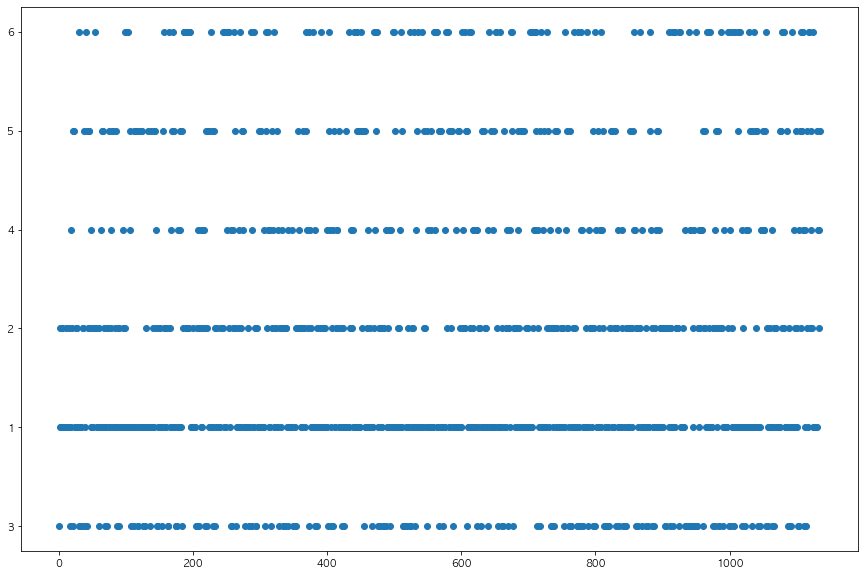

In [124]:
plt.figure(figsize=(15, 10))
plt.scatter(df_topic['index'], df_topic['Dominant_Topic'])